**Premier League Data Analysis and Visualization**



Data and Library Import

In [1]:
#https://www.kaggle.com/themlphdstudent/premier-league-player-stats-data

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/premier-league-player-stats-data/Premier League Player Stats.csv


In [2]:
df = pd.read_csv('/kaggle/input/premier-league-player-stats-data/Premier League Player Stats.csv')

#Calculation of Goal Percentage ,Shot on Target Percentage 
#and Minutes needed for one goal

df.loc[df['G'] > 0, 'OG%'] =  round(df['SOG']/df['SHOTS'],3)*100
df.loc[df['G'] > 0, 'G%'] =  round(df['G']/df['SHOTS'],3)*100
df.loc[df['G'] > 0, 'MP_Goal'] = round(df['MIN']/df['G'],1)

# For those who didn't score at all, the % will be set to zero.
df.loc[df['G'] <= 0, 'OG%'] =  0
df.loc[df['G'] <= 0, 'G%'] =  0
df.loc[df['G'] <= 0, 'MP_Goal'] = 0

print('Three new columns are added as below :\n')
df.head()




Three new columns are added as below :



,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,OG%,G%,MP_Goal
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43,60.6,32.4,131.9
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38,57.6,33.3,127.8
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42,60.0,31.4,142.6
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38,55.9,29.4,133.0
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59,62.1,20.0,151.8


In [3]:
print('The top 5 player with highest On Goal Shots :\n')
df_OG = df.sort_values(by=['OG%'], ascending=False,kind='mergesort')
df_OG.head(5)



The top 5 player with highest On Goal Shots :



,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,OG%,G%,MP_Goal
239,240,DeAndre Yedlin,Newcastle United,16,10,936,1,0,1,1,100.0,100.0,936.0
108,109,Jeffrey Schlupp,Crystal Palace,17,11,1034,3,1,12,10,83.3,25.0,344.7
148,149,Ciaran Clark,Newcastle United,14,14,1188,2,0,5,4,80.0,40.0,594.0
165,166,Florian Lejeune,Newcastle United,6,4,441,2,0,4,3,75.0,50.0,220.5
24,25,Troy Deeney,Watford,27,26,2234,10,2,32,23,71.9,31.2,223.4


In [4]:
# From the result above, it can be seen that some players have little
# shot attempts and high percentage which is not very significant. 
# Therefore, I try to adjust this by adding threshold 
# that shot attempt >= 38 ,i.e. at least one shot per match

df_OG = df_OG[df_OG['SHOTS']>37]
df_OG.head(10)

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,OG%,G%,MP_Goal
9,10,Anthony Martial,Manchester United,32,31,2638,17,6,59,40,67.8,28.8,155.2
18,19,Riyad Mahrez,Manchester City,33,21,1940,11,9,51,32,62.7,21.6,176.4
17,18,Teemu Pukki,Norwich City,36,33,2892,11,3,56,35,62.5,19.6,262.9
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59,62.1,20.0,151.8
19,20,Heung-Min Son,Tottenham Hotspur,30,28,2485,11,10,62,38,61.3,17.7,225.9
47,48,Harvey Barnes,Leicester City,36,24,2090,6,8,46,28,60.9,13.0,348.3
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43,60.6,32.4,131.9
57,58,James Ward-Prowse,Southampton,38,38,3420,5,3,43,26,60.5,11.6,684.0
28,29,Willian Borges Da Silva,Chelsea,36,29,2601,9,7,48,29,60.4,18.8,289.0
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42,60.0,31.4,142.6


From the result above , **Martial, Mahrez, Pukki, Salsh and Son** have the best Shot on Goal percentage. 

In [5]:
print('The top 5 player with highest Goal/Shots Accurary:\n')
df_G = df[df['SHOTS']>37]
df_G = df_G.sort_values(by=['G%'], ascending=False,kind='mergesort')
df_G.head(5)



The top 5 player with highest Goal/Shots Accurary:



,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,OG%,G%,MP_Goal
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38,57.6,33.3,127.8
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43,60.6,32.4,131.9
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42,60.0,31.4,142.6
10,11,Sergio Leonel Agüero del Castillo,Manchester City,24,18,1456,16,3,54,28,51.9,29.6,91.0
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38,55.9,29.4,133.0


From the result above , **Ings,Vardy,Aubameyang, Aguero and Sterling** have the best Shot on Goal percentage. 

(470, 13)
                          TEAM
Manchester United           27
Chelsea                     26
Aston Villa                 26
Newcastle United            26
Norwich City                26
Arsenal                     26
Bournemouth                 25
Watford                     25
Liverpool                   24
West Ham United             24
Tottenham Hotspur           23
Southampton                 23
Sheffield United            23
Manchester City             22
Crystal Palace              22
Leicester City              22
Everton                     22
Brighton and Hove Albion    21
Burnley                     19
Wolverhampton Wanderers     18


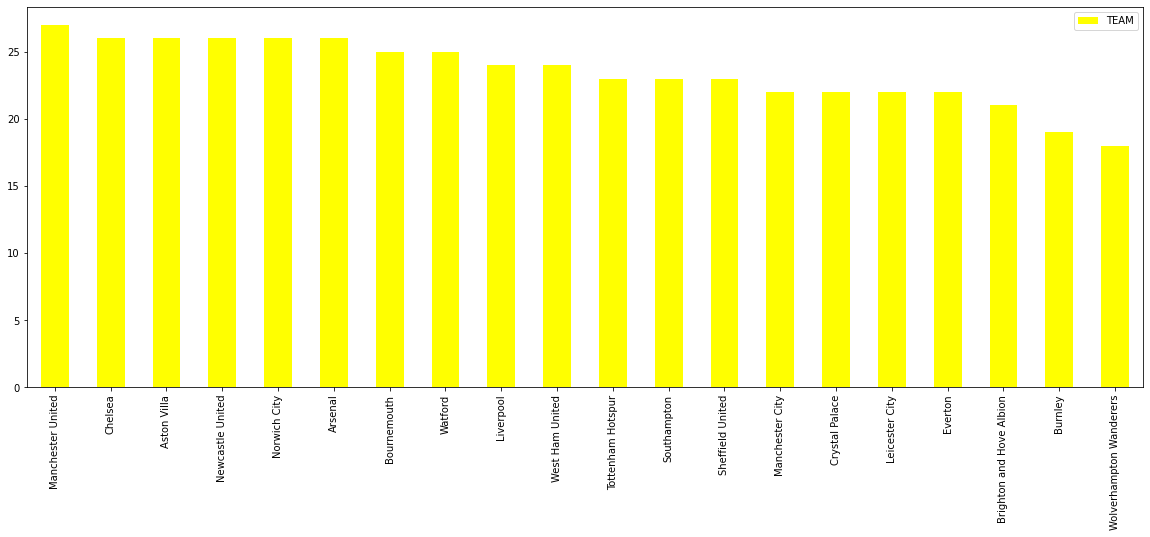

In [6]:
# This part will analyze the data by team level
#1. Number of players appeared for each team
#2. Number of players scored 
#3. Number of players assisted

#Count the number of players appeared
df_appear = df[(df.MIN > 0) ]
print(df_appear.shape)


df_appear = pd.DataFrame(df_appear['TEAM'].value_counts())
print(df_appear)

df_appear.plot.bar(color = 'yellow', figsize = (20, 7))

                                                    

(251, 13)
                          TEAM
Arsenal                     17
Liverpool                   17
Chelsea                     16
Newcastle United            16
Aston Villa                 14
Leicester City              14
West Ham United             14
Manchester City             13
Bournemouth                 12
Southampton                 12
Manchester United           12
Sheffield United            11
Tottenham Hotspur           11
Everton                     11
Wolverhampton Wanderers     11
Brighton and Hove Albion    11
Watford                     11
Burnley                     10
Crystal Palace               9
Norwich City                 9


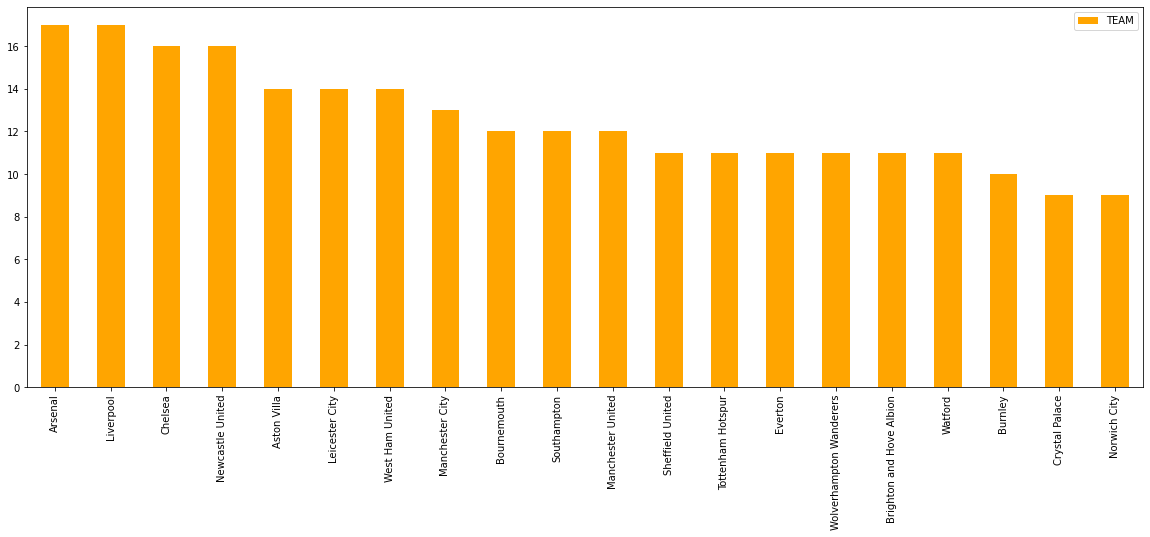

In [7]:
# No. of players with at least 1 goal
df_G = df[(df.G > 0) ]
print(df_G.shape)

# There are 251 players having goals
df_G = pd.DataFrame(df_G['TEAM'].value_counts())
print(df_G)

df_G.plot.bar(color = 'orange', figsize = (20, 7))


(253, 13)
                          TEAM
Arsenal                     17
Leicester City              16
Liverpool                   15
Southampton                 15
Chelsea                     14
Everton                     13
Aston Villa                 13
Newcastle United            13
Crystal Palace              13
West Ham United             13
Burnley                     13
Manchester City             13
Brighton and Hove Albion    12
Manchester United           12
Tottenham Hotspur           12
Sheffield United            11
Bournemouth                 11
Wolverhampton Wanderers     10
Watford                      9
Norwich City                 8


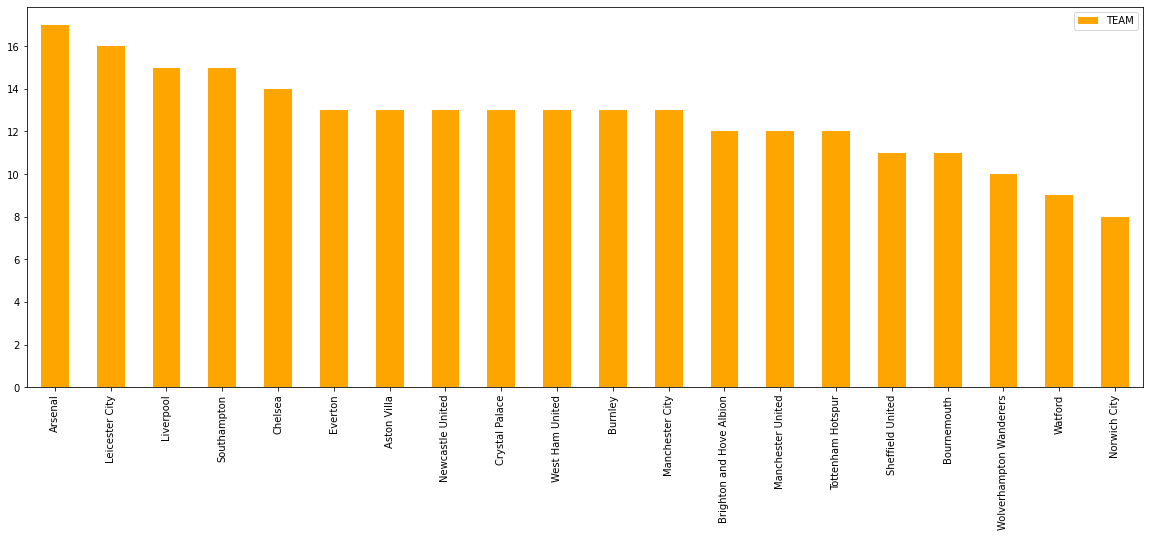

In [8]:
# No. of players with at least 1 Assist
df_Asst = df[(df.ASST > 0) ]
print(df_Asst.shape)

# There are 253 players having assists
df_Asst = pd.DataFrame(df_Asst['TEAM'].value_counts())
print(df_Asst)

df_Asst.plot.bar(color = 'orange', figsize = (20, 7))